Question: 
Filter out hospitals, churches, and higher education institutions
Filter out grantmakers from revenue analysis.
Propose a methodology for filtering out grantmakers, hospitals, churches, and higher education institutions from your revenue analysis. 
These may all be 501(c)3's but likely have large revenues that will bias our data. What fields do you use to filter out these organizations and why? 
What other fields could be biasing our data analysis, and how would you recommend managing those fields?

Overall mean: 7603991.844774303
Overall median: 110403.0
Higher Education mean: 221837657.04534006
Church mean: 499122.99775280897
Hospital mean: 254008749.93526787


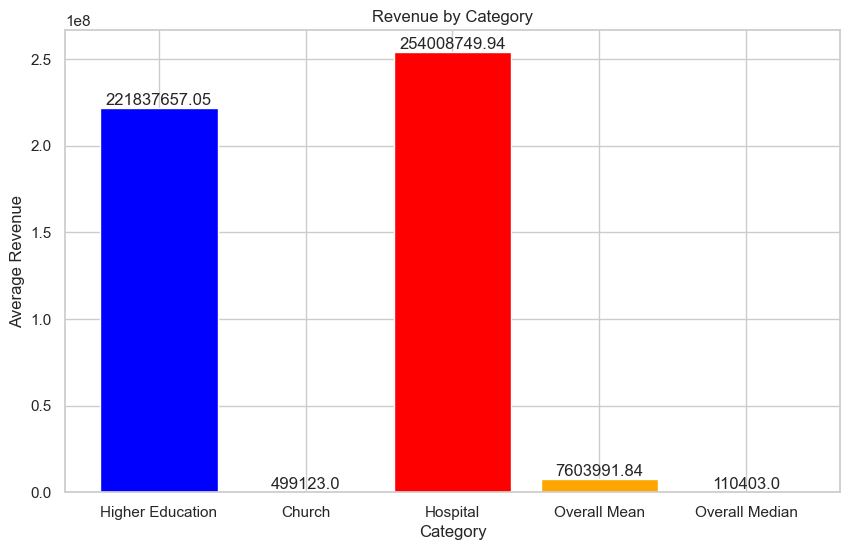

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
  
df = pd.read_csv('../../Data/Base_bundle.csv', low_memory=False)

df['ntee_code'] = df['ntee_code'].fillna('NA')

edu = df[df['ntee_code'].str.contains('B30|B40|B41|B42|B43|B50')]

church_1 = df[df['ntee_code'].str.contains('X20|X21|X22|X30')]

hosp_1 = df[df['ntee_code'].str.contains('E20|E21|E22|E24')]

avg_revenue_edu = edu['total_revenue'].mean()
avg_revenue_church = church_1['total_revenue'].mean()
avg_revenue_church2 = church_2['total_revenue'].mean()
avg_revenue_hosp = hosp_1['total_revenue'].mean()

# Filter rows where total revenue is above the average for each DataFrame
overall_mean = df['total_revenue'].mean()


print('Overall mean:', overall_mean)
print('Overall median:', df['total_revenue'].median())
print('Higher Education mean:', avg_revenue_edu)
print('Church mean:', avg_revenue_church)
print('Hospital mean:', avg_revenue_hosp)

categories = ['Higher Education', 'Church', 'Hospital', 'Overall Mean', 'Overall Median']
avg_revenues = [avg_revenue_edu, avg_revenue_church, avg_revenue_hosp, overall_mean, df['total_revenue'].median()]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, avg_revenues, color=['blue', 'green', 'red', 'orange', 'yellow'])
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Overall mean: 7603991.844774303
Overall median: 110403.0
Mean Total Revenue for Schools: 22513557.08837602
Mean Total Revenue for Hospitals: 153387758.38795182
Mean Total Revenue for Churches: 432397.2679425837


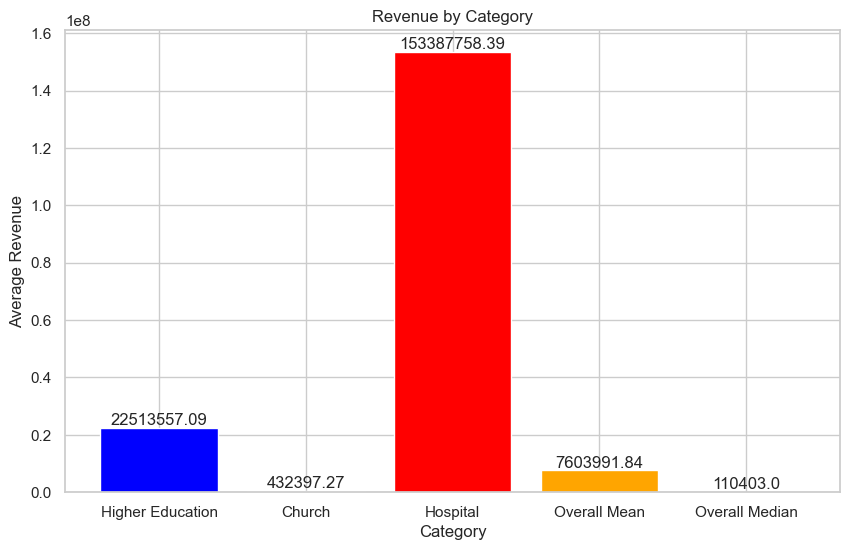

In [67]:
is_school = df['organization_name'].str.contains('school|college|university|academy', case=False)
is_hospital = df['organization_name'].str.contains('hospital|clinic|medical center', case=False)
is_church = df['organization_name'].str.contains('church', case=False)

# Filter DataFrame based on each category
schools = df[is_school]
hospitals = df[is_hospital]
churches = df[is_church]

mean_total_revenue_schools = schools['total_revenue'].mean()
mean_total_revenue_hospitals = hospitals['total_revenue'].mean()
mean_total_revenue_churches = churches['total_revenue'].mean()

print('Overall mean:', overall_mean)
print('Overall median:', df['total_revenue'].median())
print("Mean Total Revenue for Schools:", mean_total_revenue_schools)
print("Mean Total Revenue for Hospitals:", mean_total_revenue_hospitals)
print("Mean Total Revenue for Churches:", mean_total_revenue_churches)

categories = ['Higher Education', 'Church', 'Hospital', 'Overall Mean', 'Overall Median']
avg_revenues = [mean_total_revenue_schools, mean_total_revenue_churches, mean_total_revenue_hospitals, overall_mean, df['total_revenue'].median()]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, avg_revenues, color=['blue', 'green', 'red', 'orange', 'yellow'])
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [72]:
not_edu_church_hosp = df[~df['ntee_code'].str.contains('B30|B40|B41|B42|B43|B50|X20|X21|X22|X30|E20|E21|E22|E24')]

second_filter = not_edu_church_hosp[~not_edu_church_hosp['organization_name'].str.contains('school|college|university|academy|hospital|clinic|medical center|church', case=False)]

print('Overall mean before filter:', overall_mean)
print('Overall median after filter:', df['total_revenue'].median())
print('Overall mean after code filter:', not_edu_church_hosp['total_revenue'].mean())
print('Overall mean after code & name filter:', second_filter['total_revenue'].mean())

Overall mean before filter: 7603991.844774303
Overall median after filter: 110403.0
Overall mean after code filter: 4489215.452467225
Overall mean after code & name filter: 4317135.842705872
